In [2]:
class Heap(object):
    def __init__(self, heaplist):
        self._heaplist = heaplist.copy()
        self._heapsize = len(heaplist)
        
    def getheaplist(self):
        return self._heaplist
    
    def _swap(self, node_i, node_j):
        self._heaplist[node_i], self._heaplist[node_j] = self._heaplist[node_j], self._heaplist[node_i]
    
    def _heapify(self, node_i):
        left = 2 * node_i + 1
        right = 2 * node_i + 2
        largest_index = node_i
        if (left < self._heapsize) and (self._heaplist[left] > self._heaplist[node_i]):
            largest_index = left
        if (right < self._heapsize) and (self._heaplist[right] > self._heaplist[largest_index]):
            largest_index = right
        if largest_index != node_i:
            self._swap(node_i, largest_index)
            self._heapify(largest_index)
    
    def buildheaptree(self):
        for index in range(int((self._heapsize + 1) / 2), -1, -1):
            self._heapify(index)
            
    def heapsort(self):
        sortedlist = []
        temptree = Heap(self._heaplist)
        temptree.buildheaptree()
        temptree = temptree.getheaplist()
        for index in range(self._heapsize - 2):
            sortedlist.append(temptree.pop(0))
            temptree = Heap(temptree)
            temptree.buildheaptree()
            temptree._heapify(0)
            temptree = temptree.getheaplist()
        sortedlist += temptree
        return sortedlist

In [7]:
A = [-1,8,14,4,16,7,9,3,2,10,1]

In [8]:
heap = Heap(A)

In [9]:
heap.buildheaptree()

In [10]:
heap.heapsort()

[16, 14, 10, 9, 8, 7, 4, 3, 2, 1, -1]

# Time Complexity Analysis

In [110]:
import random
import time
import matplotlib.pyplot as plt
random_list = []
for i in range(1000):
    random_list.append(random.sample(range(1000), i))

In [111]:
time_list = []
for i in range(1000):
    time1 = time.time()
    heap = Heap(random_list[i])
    heap.heapsort()
    time2 = time.time()
    time_list.append(time2 - time1)

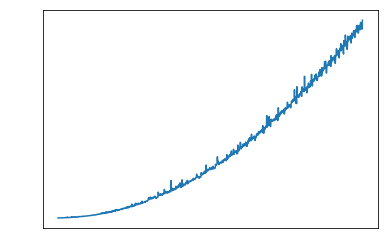

In [120]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(range(1000), time_list)
ax.tick_params(axis='x')
ax.tick_params(axis='y');

Time complexity: $O(n*log(n))$